In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Variables del dataset Bank Marketing

**1. age**: Edad del cliente (numérica)  

**2. job**: Tipo de ocupación del cliente  
_Categórica_: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown'  

**3. marital**: Estado civil del cliente  
_Categórica_: 'divorced', 'married', 'single', 'unknown'  
_Nota_: 'divorced' incluye divorciado y viudo  

**4. education**: Nivel educativo del cliente  
_Categórica_: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown'  

**5. default**: ¿Tiene historial de crédito en mora?  
_Categórica_: 'no', 'yes', 'unknown'  

**6. housing**: ¿Tiene crédito hipotecario?  
_Categórica_: 'no', 'yes', 'unknown'  

**7. loan**: ¿Tiene préstamo personal?  
_Categórica_: 'no', 'yes', 'unknown'  

**8. contact**: Tipo de canal de contacto  
_Categórica_: 'cellular', 'telephone'  

**9. month**: Mes del último contacto  
_Categórica_: 'jan', 'feb', ..., 'dec'  

**10. day_of_week**: Día de la semana del último contacto  
_Categórica_: 'mon', 'tue', 'wed', 'thu', 'fri'  

**11. duration**: Duración del último contacto en segundos  
_Numérica_  
_Nota_: No debe usarse como predictor real, ya que solo se conoce después de realizada la llamada.  

**12. campaign**: Número de contactos realizados en esta campaña  
_Numérica_  

**13. pdays**: Días desde el último contacto en campañas anteriores  
_Numérica_ (999 indica que no fue contactado antes)  

**14. previous**: Número de contactos realizados antes de esta campaña  
_Numérica_  

**15. poutcome**: Resultado de la campaña anterior  
_Categórica_: 'failure', 'nonexistent', 'success'  

**16. emp.var.rate**: Tasa de variación del empleo (trimestral)  
_Numérica_  

**17. cons.price.idx**: Índice de precios al consumidor (mensual)  
_Numérica_  

**18. cons.conf.idx**: Índice de confianza del consumidor (mensual)  
_Numérica_  

**19. euribor3m**: Tasa euríbor a 3 meses (diaria)  
_Numérica_  

**20. nr.employed**: Número de empleados en la economía (trimestral)  
_Numérica_  


In [2]:
df = pd.read_csv('bank_marketing.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
df.describe().transpose().round(2)  

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.02,10.42,17.00,32.00,38.00,47.00,98.00
duration,41188.0,258.29,259.28,0.00,102.00,180.00,319.00,4918.00
campaign,41188.0,2.57,2.77,1.00,1.00,2.00,3.00,56.00
pdays,41188.0,962.48,186.91,0.00,999.00,999.00,999.00,999.00
previous,41188.0,0.17,0.49,0.00,0.00,0.00,0.00,7.00
emp.var.rate,41188.0,0.08,1.57,-3.40,-1.80,1.10,1.40,1.40
cons.price.idx,41188.0,93.58,0.58,92.20,93.08,93.75,93.99,94.77
cons.conf.idx,41188.0,-40.50,4.63,-50.80,-42.70,-41.80,-36.40,-26.90
euribor3m,41188.0,3.62,1.73,0.63,1.34,4.86,4.96,5.04
nr.employed,41188.0,5167.04,72.25,4963.60,5099.10,5191.00,5228.10,5228.10


In [6]:
#this function returns categorical variables
def return_categorical(df):

  categorical_columns = [column_name for column_name in df if df[column_name].dtype == 'O']
  return categorical_columns

#this function returns numerical variables
def return_numerical(df):

  return list(set(df.columns) - set(return_categorical(df)))

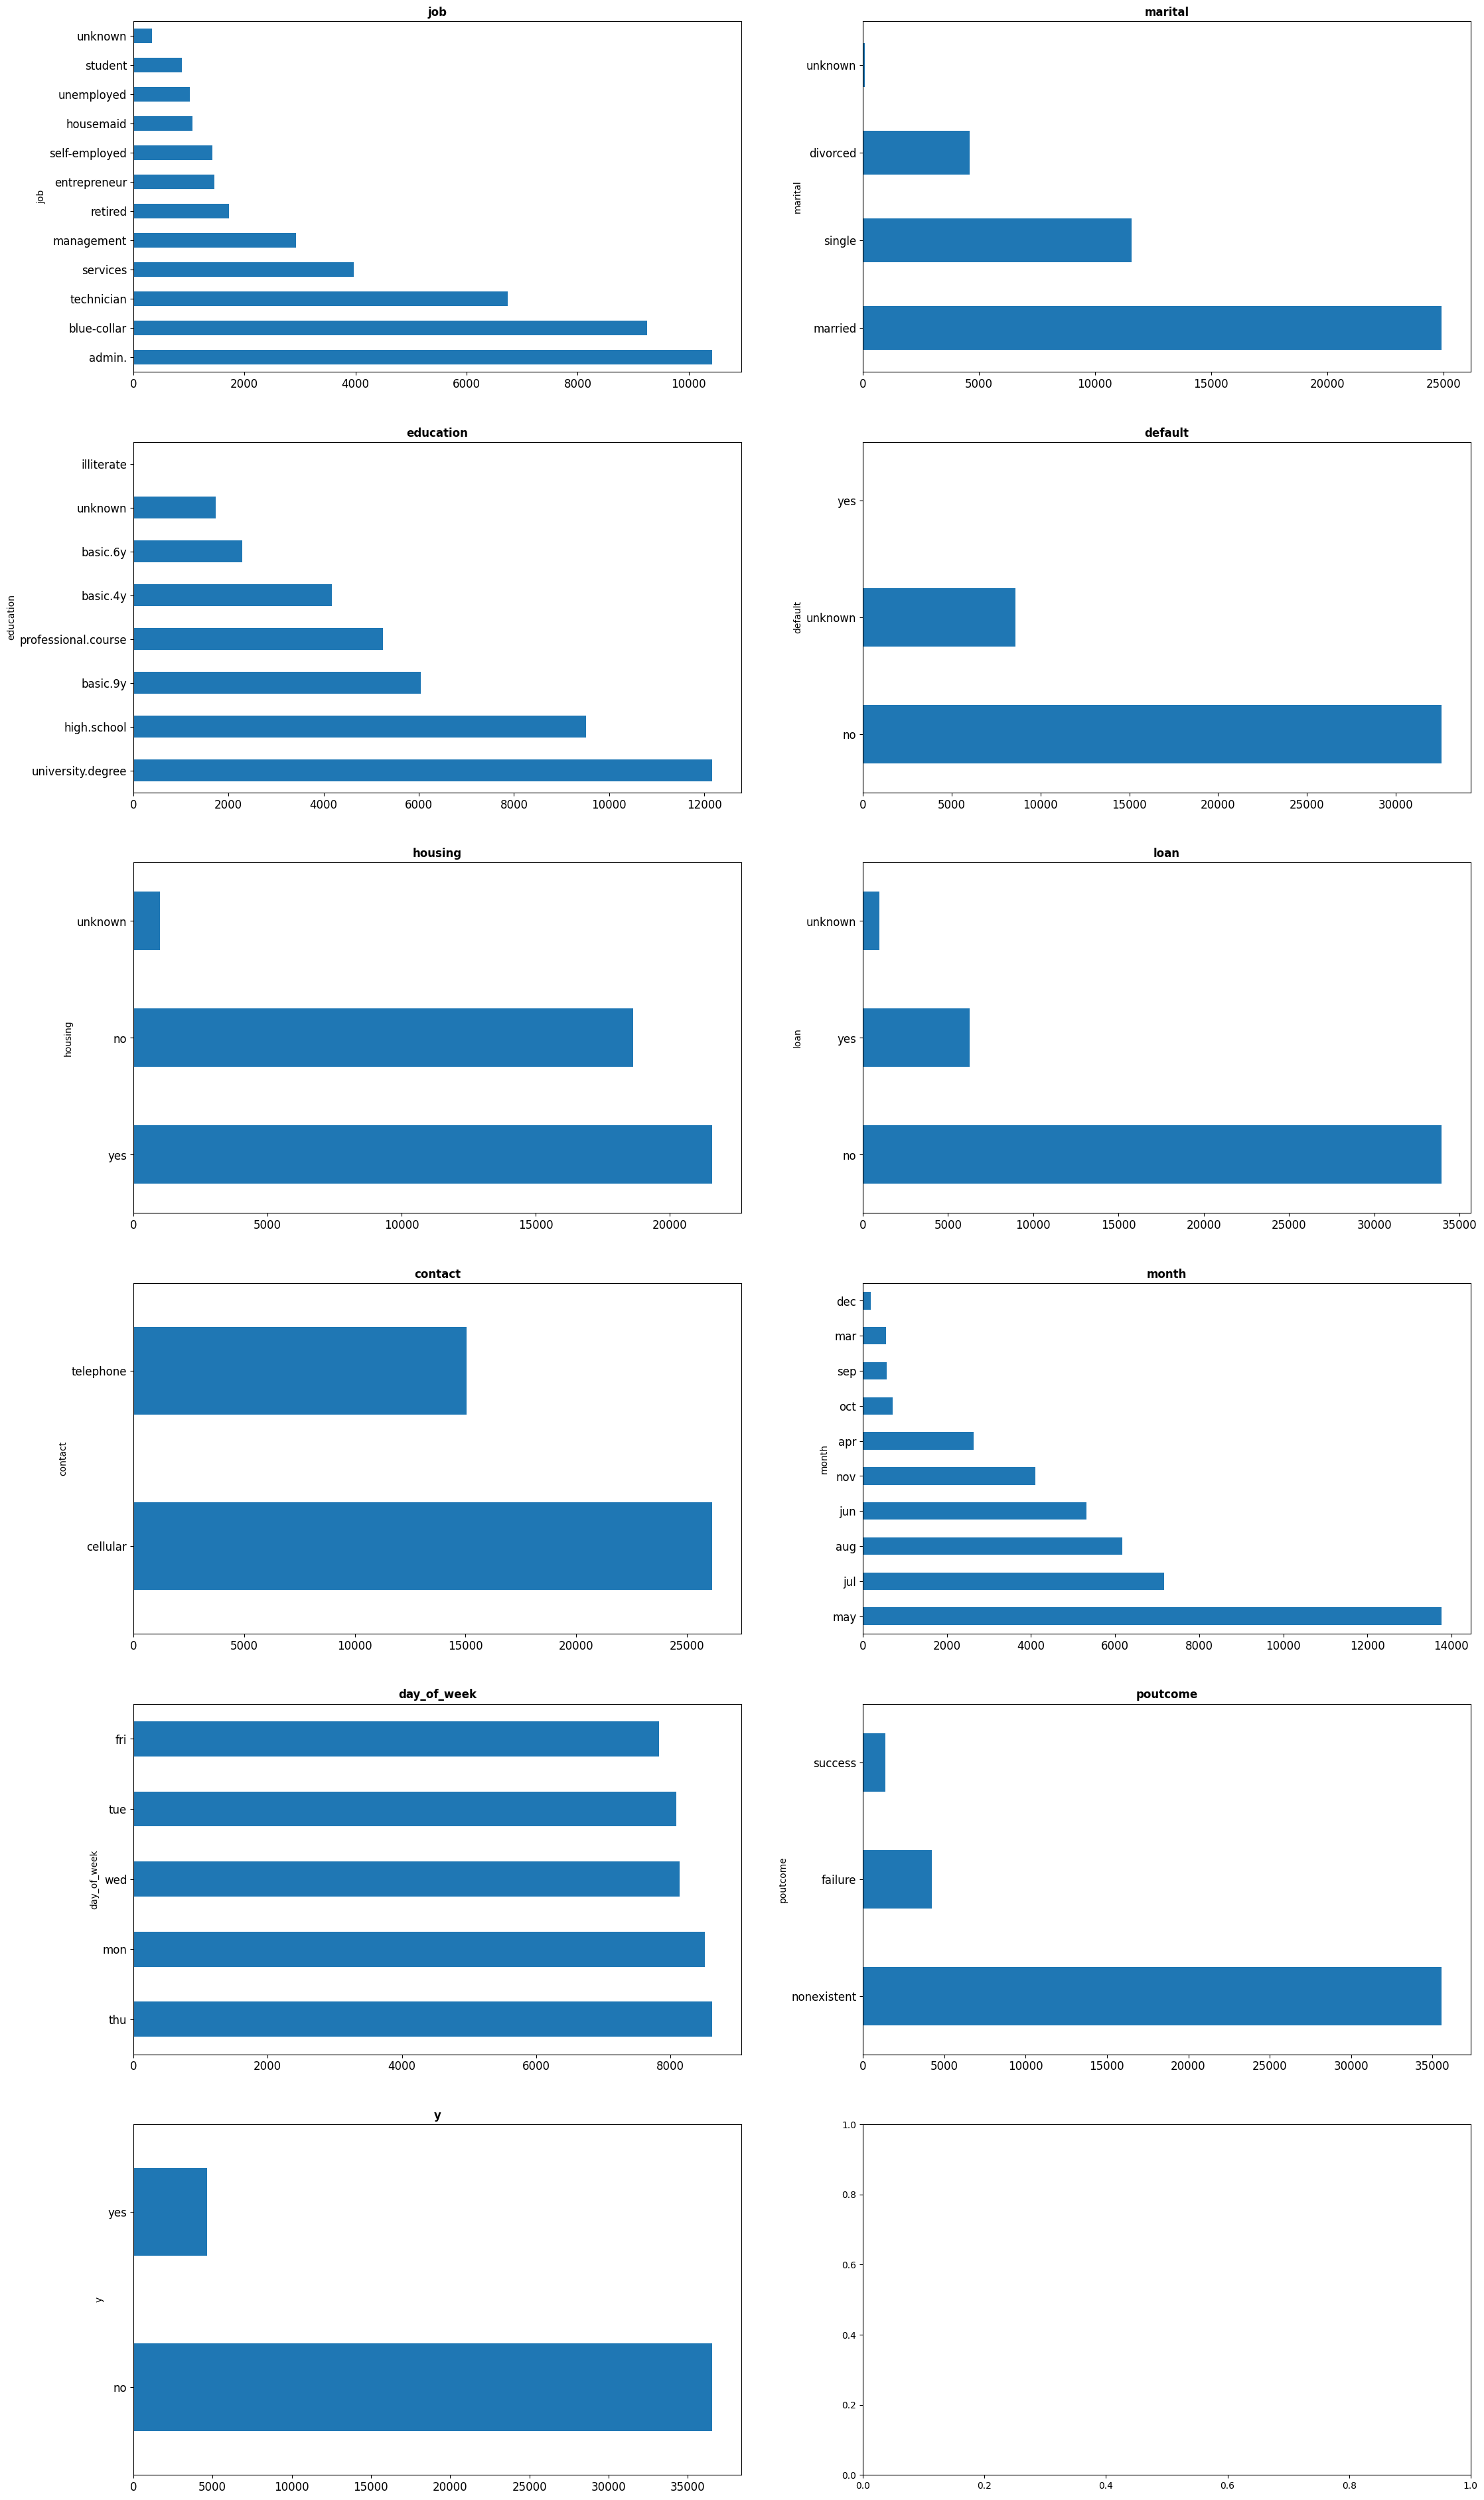

In [7]:
def eda_categorical_charts(cat):
    
    # Calculate the number of rows needed
    from math import ceil
    rows = ceil(cat.shape[1] / 2)

    # Define the plot
    f, ax = plt.subplots(nrows = rows, ncols = 2, figsize = (26, rows * 8))

    # Flatten the axes array to iterate over it as if it were 1-dimensional instead of 2
    ax = ax.flat 

    # Create the loop that adds charts
    for each, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[each])
        ax[each].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[each].tick_params(labelsize = 12)
        
eda_categorical_charts(df.select_dtypes('O'))

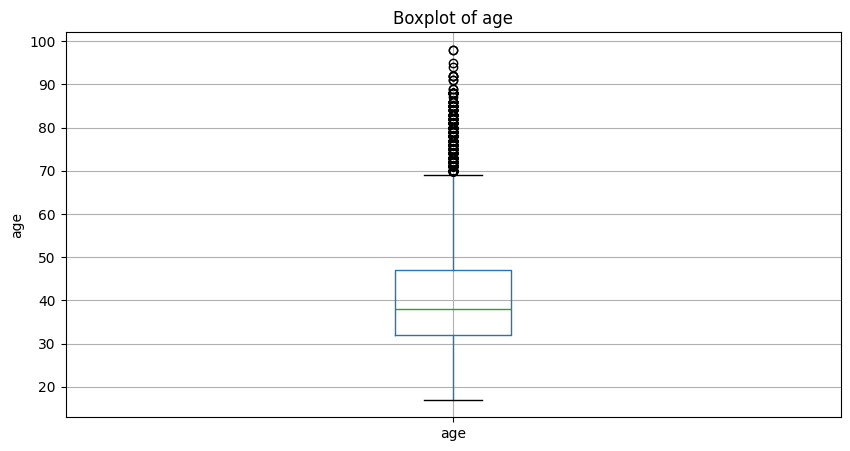

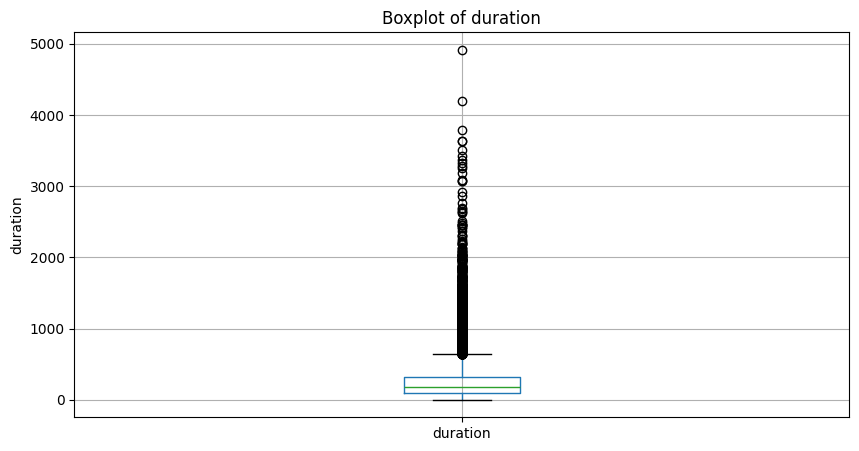

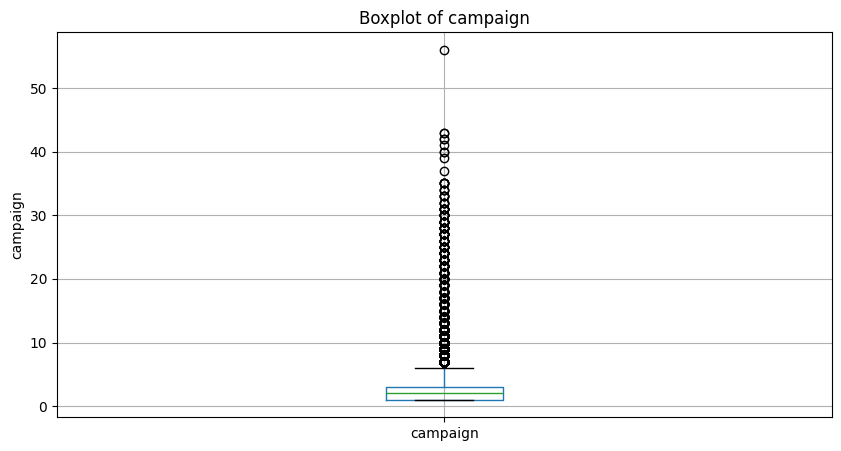

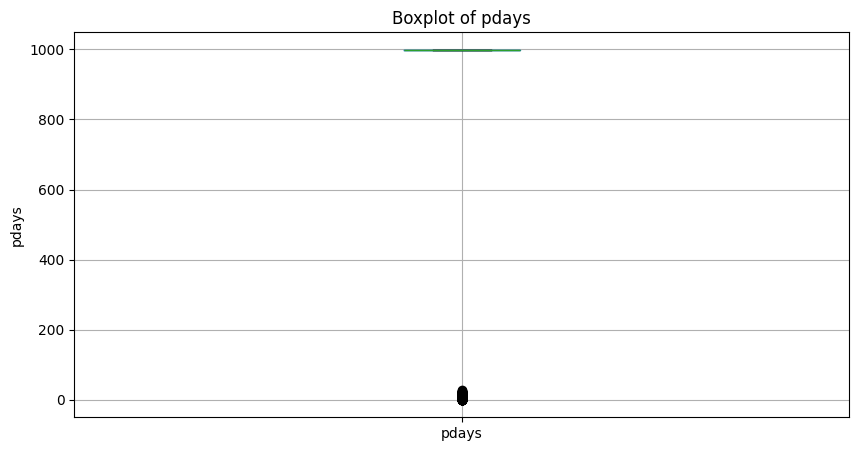

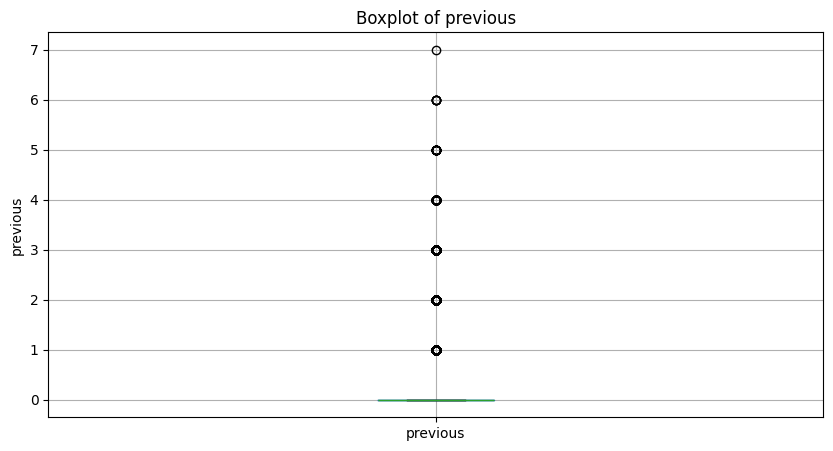

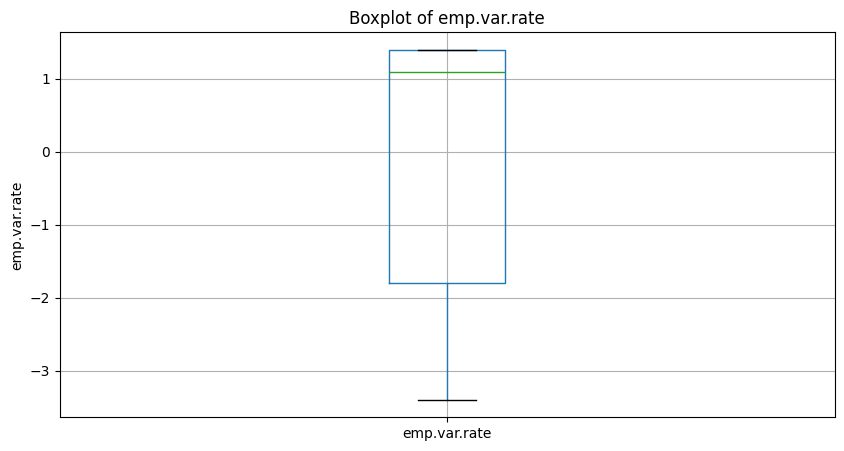

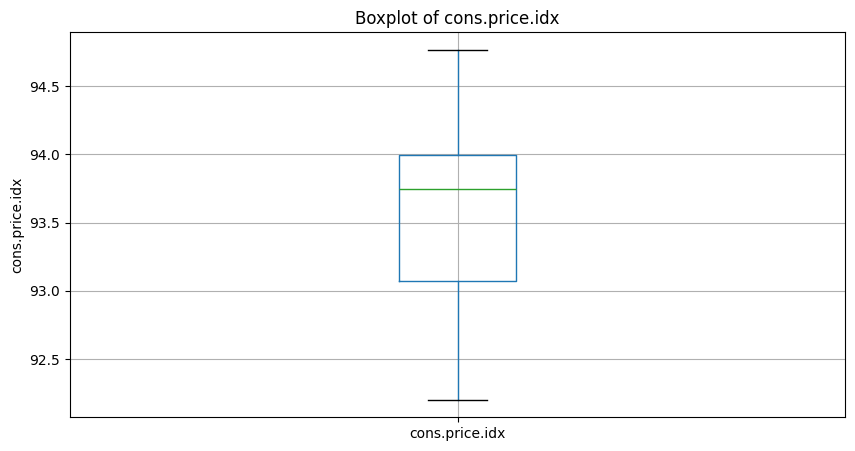

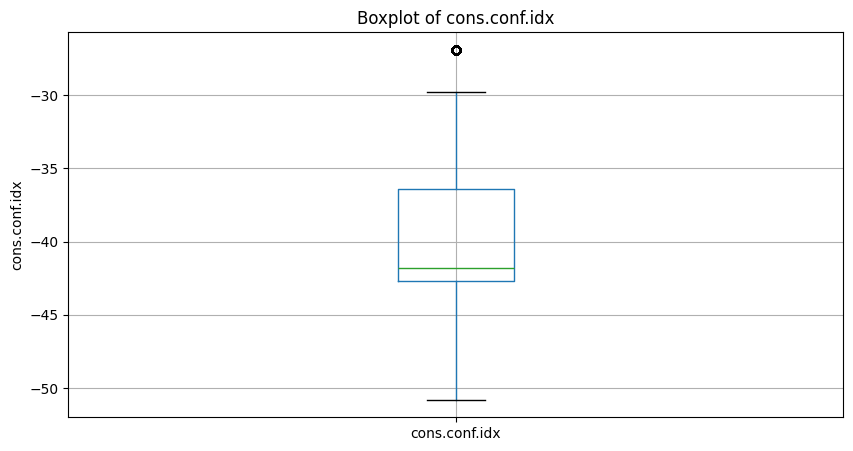

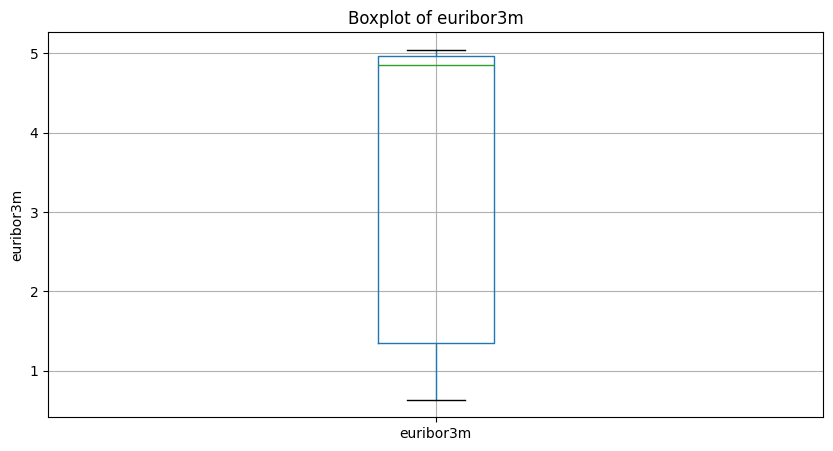

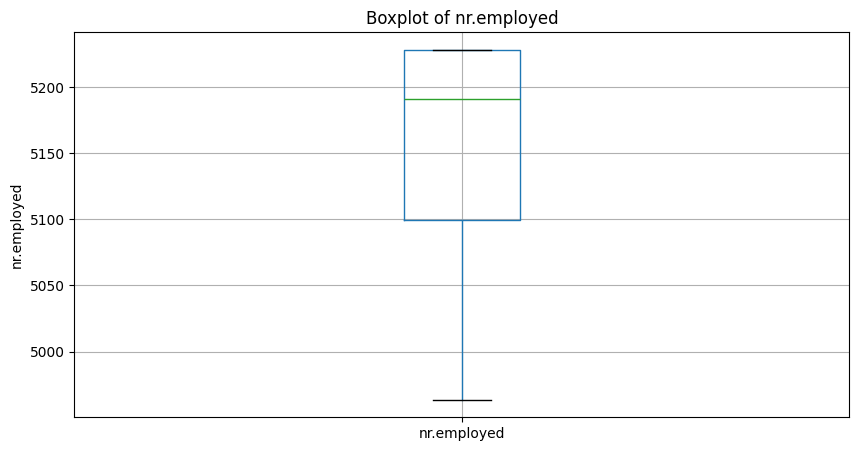

In [8]:
def boxplot_charts(df):
    
    # Select only numeric columns
    df_numeric = df.select_dtypes('number')
    
    # Iterate over each numeric column
    for column in df_numeric.columns:
        plt.figure(figsize=(10, 5))
        df.boxplot(column=column)
        plt.title(f'Boxplot of {column}')
        plt.ylabel(column)
        plt.show()
        

boxplot_charts(df)

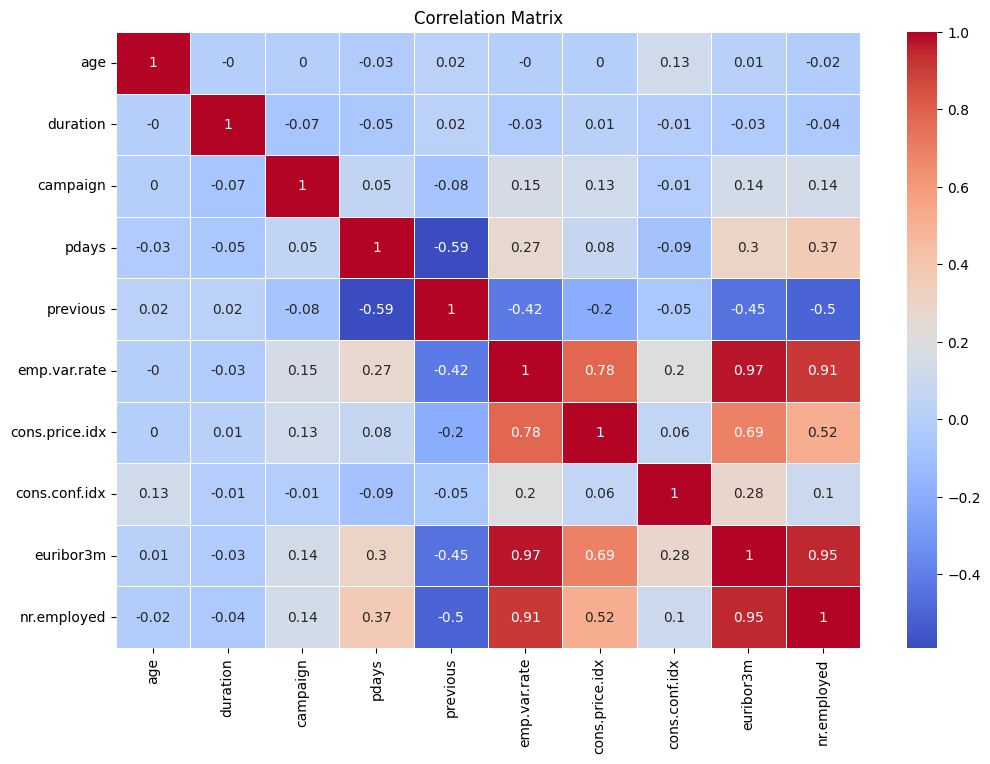

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.00,-0.00,0.00,-0.03,0.02,-0.00,0.00,0.13,0.01,-0.02
duration,-0.00,1.00,-0.07,-0.05,0.02,-0.03,0.01,-0.01,-0.03,-0.04
campaign,0.00,-0.07,1.00,0.05,-0.08,0.15,0.13,-0.01,0.14,0.14
pdays,-0.03,-0.05,0.05,1.00,-0.59,0.27,0.08,-0.09,0.30,0.37
previous,0.02,0.02,-0.08,-0.59,1.00,-0.42,-0.20,-0.05,-0.45,-0.50
emp.var.rate,-0.00,-0.03,0.15,0.27,-0.42,1.00,0.78,0.20,0.97,0.91
cons.price.idx,0.00,0.01,0.13,0.08,-0.20,0.78,1.00,0.06,0.69,0.52
cons.conf.idx,0.13,-0.01,-0.01,-0.09,-0.05,0.20,0.06,1.00,0.28,0.10
euribor3m,0.01,-0.03,0.14,0.30,-0.45,0.97,0.69,0.28,1.00,0.95
nr.employed,-0.02,-0.04,0.14,0.37,-0.50,0.91,0.52,0.10,0.95,1.00


In [11]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr().round(2)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
correlation_matrix

In [12]:
df.drop(['day_of_week', 'contact', 'month'], axis=1, inplace = True)